# Projet Fraude 



In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

#autres

### Importer les dataset

In [2]:
#target --> class : 1 Fraud | 0 ok 


In [3]:
#Importe de Fraud_Data en DataFrame
df_fraud = pd.read_csv("./dataset/Fraud_Data.csv", parse_dates=['signup_time', 'purchase_time'])
df_fraud.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
#Importe de IpAddress_to_Country en DataFrame
df_country = pd.read_csv("./dataset/IpAddress_to_Country.csv")
# df_country['upper_bound_ip_address'] = df_country['upper_bound_ip_address'].astype('float')
df_country.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

In [19]:
country = pd.DataFrame(np.zeros((len(df_fraud),1)),columns=['country'])
# cc = 10*[0]
df1 = df_fraud.sample(10)
df2 = df_country.sample(10)
for index, ele in df_fraud['ip_address'].iteritems():
   join = df_country[(df_country['lower_bound_ip_address']<ele) & (df_country['upper_bound_ip_address']>ele)]['country']
   if len(join) == 1:
        country['country'][index] = join.values[0] 
   else:
        country['country'][index] = 'NN'
#    country['country'] = join.values
df_fraud['country'] = country['country']
df_fraud.head(5)
# country



,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [22]:
df_fraud.to_csv('./dataset/fraud_country.csv')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [3]:
df_join = pd.read_csv("./dataset/fraud_country.csv",parse_dates=['signup_time', 'purchase_time'])
from datetime import timedelta 
#sign_up-purchase_time
# df_join['signup_time'] = pd.to_datetime(df_join['signup_time'], format="%Y-%m-%d %H:%M:%S")
# df_join['purchase_time']= pd.to_datetime(df_join['purchase_time'], format="%Y-%m-%d %H:%M:%S")
df_join['time_diff'] = df_join['purchase_time']-df_join['signup_time']
df_join['time_diff'] = df_join['time_diff'].apply(lambda x: x.seconds)
df_join.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NN,60085
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [4]:
test = df_join.groupby('device_id')['user_id'].count()
tes = test[df_join['device_id']]
tes = tes.reset_index(drop=1)
df_join['device_num']= tes
df_join.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NN,60085,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,60085,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1


### Faire de même pour les `ip_address` 

In [5]:
test_ip = df_join.groupby('ip_address')['user_id'].count()
tes_ip = test_ip[df_join['ip_address']]
tes_ip = tes_ip.reset_index(drop=1)
df_join['ip_num']= tes_ip
df_join.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NN,60085,1,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [6]:
df_join['signup_day'] = df_join['signup_time'].dt.weekday
df_join['signup_week']= df_join['signup_time'].dt.week
df_join['purchase_day'] = df_join['purchase_time'].dt.weekday
df_join['purchase_week']= df_join['purchase_time'].dt.week


In [7]:
#supp purchase et signup et device id
#del df_join['purchase_time']
#del df_join['signup_time']
del df_join['device_id']



### Définir vos variables de travail (X,y)

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Il me manquera 'pourchase_week', 'signup_week','signup_day','purchase_day'
X = df_join[['time_diff','purchase_week','purchase_day','ip_num','device_num','signup_day','signup_week','purchase_value','age',
'country','sex','browser','source']]
#class car c4est pour savoir si c'est un bot ou une fraude
y = df_join['class']
# a redefinir car on va traiter les variable categoriel

In [9]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      151112 non-null  int64         
 1   user_id         151112 non-null  int64         
 2   signup_time     151112 non-null  datetime64[ns]
 3   purchase_time   151112 non-null  datetime64[ns]
 4   purchase_value  151112 non-null  int64         
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
 12  time_diff       151112 non-null  int64         
 13  device_num      151112 non-null  int64         
 14  ip_num          151112 non-null  int

### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
signup_day        151112 non-null int64
signup_week       151112 non-null int64
purchase_day      151112 non-null int64
purchase_week     151112 non-null int64
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
country           151112 non-null object
time_diff         151112 non-null int64
device_num        151112 non-null int64
ip_num            151112 non-null int64
class             151112 non-null int64
dtypes: int64(10), object(4)
memory usage: 17.3+ MB


### Traiter les variables catégoriques

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_join['country'] = label_encoder.fit_transform((df_join['country']))
df_join['sex'] = label_encoder.fit_transform((df_join['sex']))
df_join['source'] = label_encoder.fit_transform((df_join['source']))
df_join['browser'] = label_encoder.fit_transform((df_join['browser']))

df_join.head(5)


,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,2,0,1,39,7.327584e+08,0,84,13882,1,1,1,9,5,16
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,0,0,0,53,3.503114e+08,0,172,17944,1,1,6,23,0,24
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,2,3,1,53,2.621474e+09,1,172,1,12,12,3,1,3,1
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,2,4,1,41,3.840542e+09,0,115,60085,1,1,1,18,0,19
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,0,4,1,45,4.155831e+08,0,172,41461,1,1,1,30,2,37


In [29]:
X = df_join[['time_diff','purchase_week','purchase_day','ip_num','device_num','signup_day','signup_week','purchase_value','age',
'country','sex','browser','source']]

### Spliter vos variables 

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print("shape X : {}, shape Y : {}", format(X_train.shape),format(X_test.shape))

shape X : {}, shape Y : {} (105778, 13) (45334, 13)


### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [31]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=None)
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
model.fit(X_train,y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(y_test,predict)*100
print("L'accuracy moyenne pour 10 'fold cross validation' est %.2f"%accuracy + "%")

L'accuracy moyenne pour 10 'fold cross validation' est 95.61%


L'accuracy moyenne pour 10 'fold cross validation' est 95.56%


### Afficher les `feature_importances_`

In [136]:
plot_features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plot_features
    
    

time_diff         0.303106
purchase_week     0.173985
device_num        0.105222
ip_num            0.086551
signup_week       0.068631
purchase_value    0.064021
age               0.055645
country           0.039798
signup_day        0.031141
purchase_day      0.029864
browser           0.021345
source            0.011007
sex               0.009685
dtype: float64

time_diff         0.274568
purchase_week     0.145555
ip_num            0.137471
device_num        0.089743
signup_week       0.084465
purchase_value    0.064497
age               0.054936
country           0.040763
signup_day        0.033725
purchase_day      0.029160
browser           0.021741
source            0.013733
sex               0.009643
dtype: float64

### Vizualiser les sur un graphique 

<AxesSubplot:title={'center':'Visualizing Important Features'}, xlabel='Feature importance Score', ylabel='Features'>

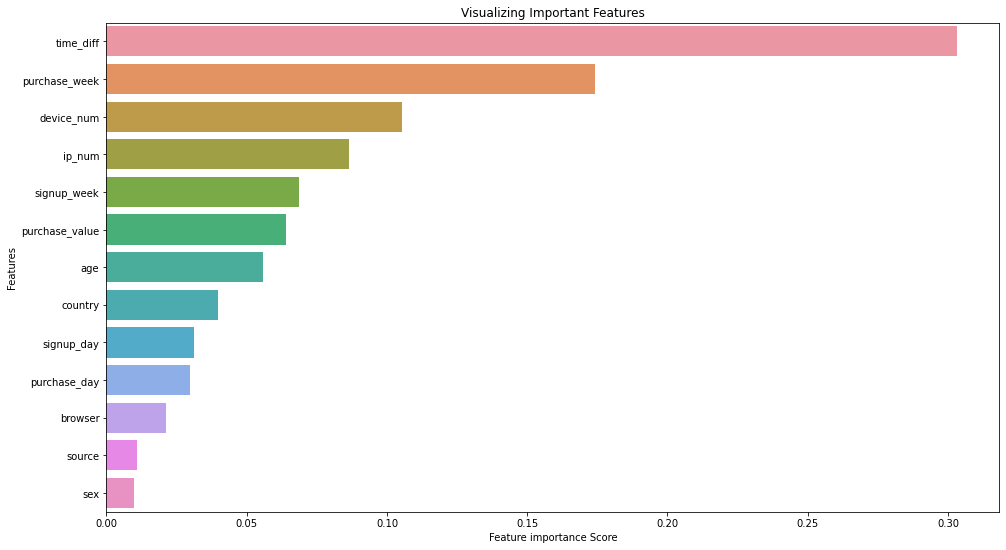

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(0.5, figsize=(16, 9))
plt.title('Visualizing Important Features')
plt.xlabel('Feature importance Score')
plt.ylabel('Features')
sns.barplot(x=plot_features, y=plot_features.index)
#plot_features.nlargest(keep='last', n=13).plot.barh()
#plot = sns.barplot(data=plot_features,x='Feature Importance scrore',y='Features')


#Text(0.5, 1.0, 'Visualizing Important Features')

Text(0.5, 1.0, 'Visualizing Important Features')

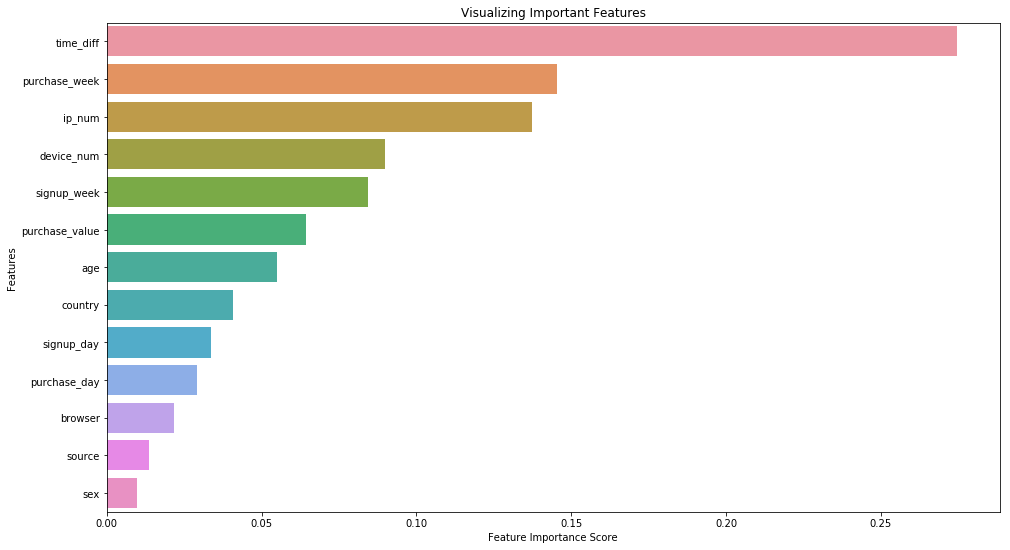

### Afficher le `Classification report`

In [117]:
from sklearn.metrics import classification_report
target_names = y
classification_report(y_test, predict,labels=[1, 2, 3])

'              precision    recall  f1-score   support\n\n           1       1.00      0.85      0.92      1455\n           2       0.00      0.00      0.00         0\n           3       0.00      0.00      0.00         0\n\n   micro avg       1.00      0.85      0.92      1455\n   macro avg       0.33      0.28      0.31      1455\nweighted avg       1.00      0.85      0.92      1455\n'

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41177
           1       1.00      0.55      0.71      4157

   micro avg       0.96      0.96      0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



### Traçer la courbe AUC 

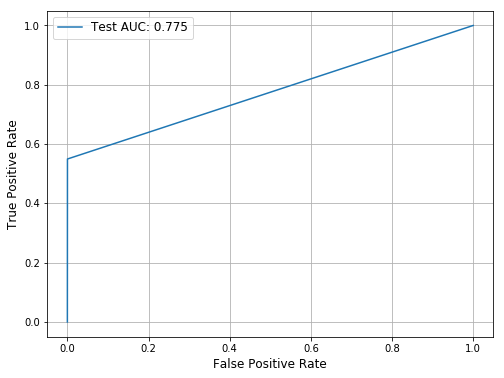

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

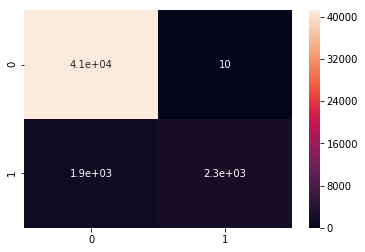

### Faire une selection de certaine variables et spliter vos varibales 

Shape du dataset d'entrainement : (105778, 4) | Shape du dataset de test : (45334, 4)


### Entrainer un classifieur `LogisticRegression` sur ces variables 

L'accuracy moyenne pour 10 'fold cross validation' est 95.39%
